<a href="https://colab.research.google.com/github/Patsonu63/Gradient-Descent-concept/blob/main/Gradient_Descent_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def compute_cost(X, y, theta):
    m = len(y)  # number of training examples
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost


In [13]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.dot(X.T, (predictions - y))
        theta -= (learning_rate / m) * errors
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


In [14]:
# Initialize variables
learning_rate = 0.01
iterations = 1000
theta = np.zeros(2)  # or you could randomize this for more advanced implementations

# Assuming you have the dataset with input features X and target values y
X = np.array([[1, 1], [1, 2], [1, 3]])  # Add a column of ones to X for the intercept term
y = np.array([1, 2, 3])

# Compute cost before starting gradient descent
initial_cost = compute_cost(X, y, theta)
print(f'Initial Cost: {initial_cost}')


Initial Cost: 21.0


In [15]:
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print(f'Theta: {theta}')
print(f'Final Cost: {cost_history[-1]}')


Theta: [0.11071521 0.95129619]
Final Cost: 0.007913097049422054


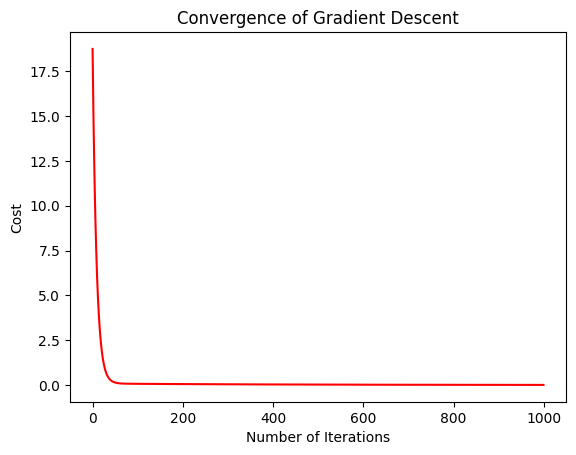

In [16]:
plt.plot(range(iterations), cost_history, 'r')
plt.title("Convergence of Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


In [17]:
new_X = np.array([[1, 4]])  # New data point for prediction
prediction = new_X.dot(theta)
print(f'Prediction for input {new_X[:, 1]}: {prediction}')


Prediction for input [4]: [3.91589997]


In [18]:
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print(f'Theta: {theta}')
print(f'Final Cost: {cost_history[-1]}')


Theta: [0.03325724 0.98537008]
Final Cost: 0.0007140102325646851


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def compute_cost(theta0, theta1, X, y):
    m = len(y)
    predictions = theta0 + theta1 * X[:, 1] # Use only the feature column of X
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

# ... (rest of your code)

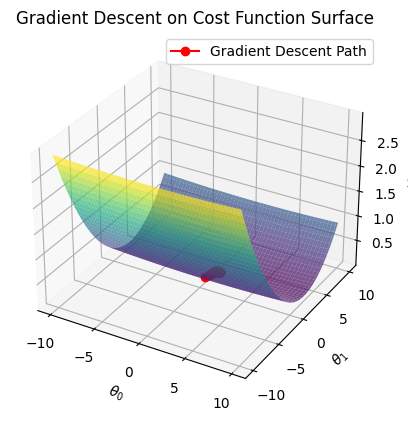

In [33]:
# Generate synthetic data
X = np.linspace(-10, 10, 100)  # 100 points from -10 to 10
y = 2 + 3 * X + np.random.randn(100) * 10  # y = 2 + 3X + noise

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((100, 1)), X] # X_b includes the bias term

# Create a grid of theta values
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Compute cost for each combination of theta0 and theta1
# Use X_b here, since compute_cost expects a 2D array
J_vals = np.array([[compute_cost(t0, t1, X_b, y) for t0, t1 in zip(t0_row, t1_row)]
                   for t0_row, t1_row in zip(T0, T1)])

# ... (rest of your code remains the same)

# Implement gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.dot(X.T, (predictions - y))
        theta -= (learning_rate / m) * errors
        history.append((theta[0], theta[1], compute_cost(theta[0], theta[1], X, y)))

    return theta, history

# Initialize theta
theta = np.array([0., 0.])
learning_rate = 0.01
iterations = 100

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((100, 1)), X]

# Run gradient descent
theta, history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Plot the 3D surface and gradient descent path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(T0, T1, J_vals, cmap='viridis', alpha=0.7)

# Plot the gradient descent path
history = np.array(history)
ax.plot(history[:, 0], history[:, 1], history[:, 2], 'r-', marker='o', label='Gradient Descent Path')

# Labels and title
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
ax.set_title('Gradient Descent on Cost Function Surface')

plt.legend()
plt.show()